# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Load information abou the api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key

# Build partial url
query_url = f"{url}appid={api_key}&units={units}&q="

# Create dataframe and add columns
cities_df = pd.DataFrame({'City':cities})
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

# Use iterrows to iterate through cities dataframe
for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['Cities']

    # assemble url and make API request   
    response = requests.get(query_url+city).json()

    try:     
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'Country'] = response['sys']['country']
        cities_df.loc[index,'Date'] = response['dt']
        cities_df.loc[index,'Humidity'] = response['main']['humidity']
        cities_df.loc[index,'Lat'] = response['coord']['lat']
        cities_df.loc[index,'Lng'] = response['coord']['lon']
        cities_df.loc[index,'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        print(f"Retrived information for country {response['id']} | {response['name']}.")
    
    except (KeyError, IndexError):
        print("City not found. Skipping.")
        
    print("------------")


ed information for country 3374083 | Bathsheba.
------------
Retrived information for country 2194098 | Ahipara.
------------
Retrived information for country 1812256 | Dongsheng.
------------
Retrived information for country 6144195 | Senneterre.
------------
Retrived information for country 3416888 | Grindavik.
------------
Retrived information for country 4037645 | State of Airai.
------------
Retrived information for country 3372472 | Vila Franca do Campo.
------------
Retrived information for country 2071860 | Esperance.
------------
Retrived information for country 1711437 | Iba.
------------
Retrived information for country 5354943 | Half Moon Bay.
------------
Retrived information for country 778362 | Øksfjord.
------------
Retrived information for country 3386213 | Touros.
------------
Retrived information for country 3466165 | Cidreira.
------------
Retrived information for country 3372964 | Lagoa.
------------
Retrived information for country 3573374 | The Valley.
----------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
cities_df.count()

Cities        607
Cloudiness    607
Country       607
Date          607
Humidity      607
Lat           607
Lng           607
Max Temp      607
Wind Speed    607
dtype: int64

In [5]:
cities_df.to_csv('cities.csv')
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [18]:
#  Change values of cities dataframe to numeric to plot them
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Lng'] = pd.to_numeric(cities_df['Lng'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

# Declare variables
clouds = cities_df['Cloudiness']
humidity = cities_df['Humidity']
lat = cities_df['Lat']
lng = cities_df['Lng']
max_temp = cities_df['Max Temp']
wind_speed = cities_df['Wind Speed']

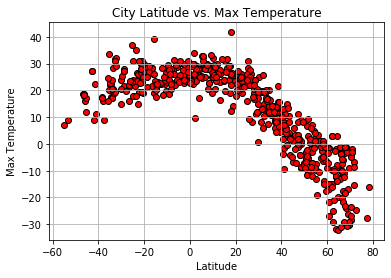

In [30]:
plt.scatter(lat,max_temp, edgecolors='black',c='red')
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

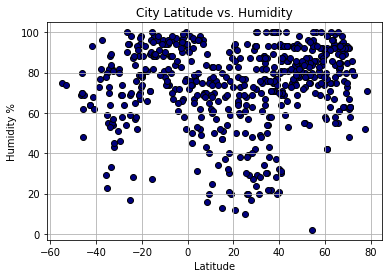

In [33]:
plt.scatter(lat,humidity, edgecolors='black',c='navy')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

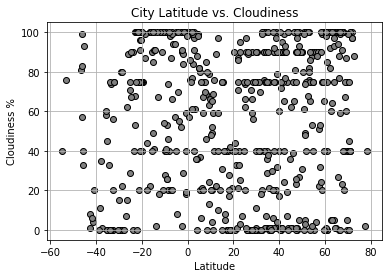

In [34]:
plt.scatter(lat,clouds, edgecolors='black',c='gray')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

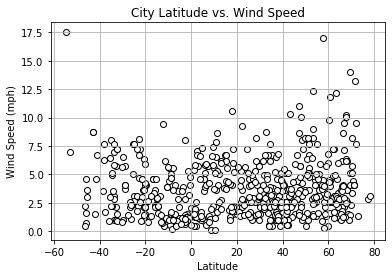

In [35]:
plt.scatter(lat,wind_speed, edgecolors='black',c='white')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


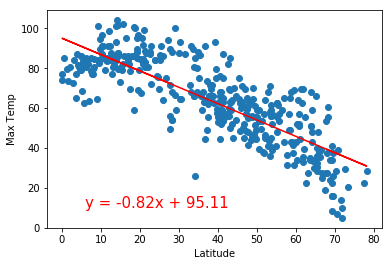

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


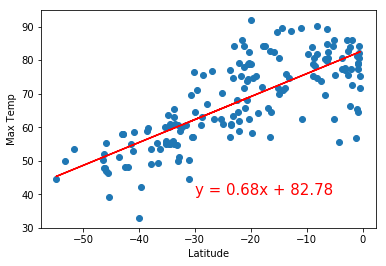

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


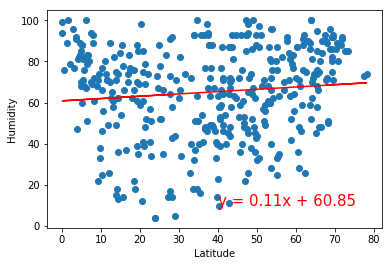

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


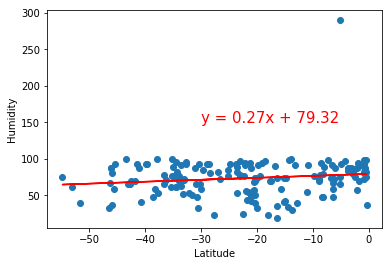

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


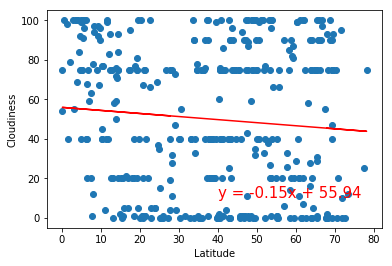

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


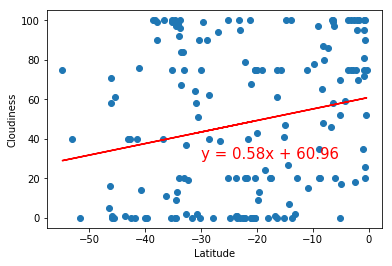

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


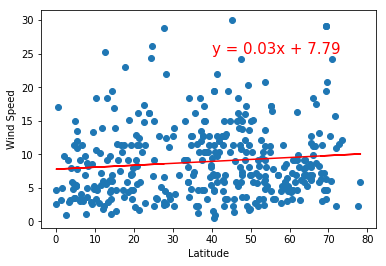

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


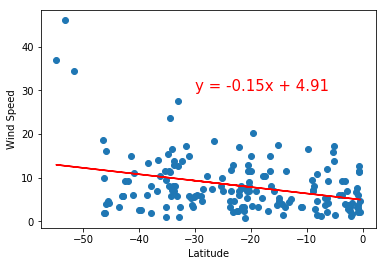